# Keywords, Collocations and Association Metrics

In [32]:
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
import math

In [1]:
file_path = Path('documents/the_challenge.txt')

with open(file_path, 'r') as f:
    the_challenge = f.read()
    
print(the_challenge)

---
title: The Challenge
author: Mohawk Mothers
publisher: Mohawk Mothers
URL: https://www.mohawkmothers.ca/the-challenge
summary: 
tags: 
    - indigenous
---
On October 27, 2022, the Mohawk Mothers won an important battle: the first-ever injunction obtained by self-represented Indigenous peoples in a Canadian Court. Following their own Indigenous legal system, the Kaianerehkó:wa, the Mohawk Mothers reminded the Quebec Superior Court of their obligations vis-à-vis Indigenous peoples and called upon the Court to respect their own laws protecting Indigenous peoples from mistreatment, including extermination policies. In court, the Mohawk Mothers faced numerous adversaries, including top lawyers from McGill University, the Société Québécoise des Infrastructures (SQI), the McGill University Health Center (MUHC), the Royal Victoria Hospital, the City of Montreal, the Attorney General of Canada, and the Attorney General of Quebec.
The injunction issued by Justice Gregory Moore was issued on

In [2]:
## removing yaml frontmatter (processing it)
challenge = the_challenge[160:]

print(challenge) # a string with the whole document


On October 27, 2022, the Mohawk Mothers won an important battle: the first-ever injunction obtained by self-represented Indigenous peoples in a Canadian Court. Following their own Indigenous legal system, the Kaianerehkó:wa, the Mohawk Mothers reminded the Quebec Superior Court of their obligations vis-à-vis Indigenous peoples and called upon the Court to respect their own laws protecting Indigenous peoples from mistreatment, including extermination policies. In court, the Mohawk Mothers faced numerous adversaries, including top lawyers from McGill University, the Société Québécoise des Infrastructures (SQI), the McGill University Health Center (MUHC), the Royal Victoria Hospital, the City of Montreal, the Attorney General of Canada, and the Attorney General of Quebec.
The injunction issued by Justice Gregory Moore was issued on the basis of the plaintiffs’ (Mohawk Mothers) concerns that Indigenous children were used as test subjects in medical experiments at the Royal Victoria Hospita

In [3]:
def tokenize(string):
    
    tokens = string.split()
    out = list()
    
    for token in tokens:
        if token.isalpha() and token != '\\n':
            out.append(token.lower())
            
    return out
            
tokens = tokenize(challenge)
for token in tokens[:10]:
    print(token)

on
october
the
mohawk
mothers
won
an
important
the
injunction


In [4]:
word_frequencies = Counter(tokens)
print("total tokens in the challenge: ", len(tokens))
word_frequencies.most_common(10)

total tokens in the challenge:  932


[('the', 104),
 ('of', 42),
 ('and', 34),
 ('to', 28),
 ('that', 21),
 ('indigenous', 16),
 ('as', 14),
 ('mohawk', 13),
 ('by', 13),
 ('in', 12)]

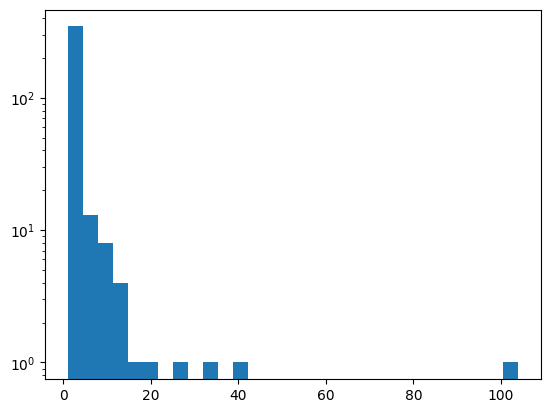

In [65]:
### long tail on data
### most words appear only once
### (note the log scale on the y axis)
counts = list(word_frequencies.values())
plt.hist(counts, bins=30, log=True)
plt.show()

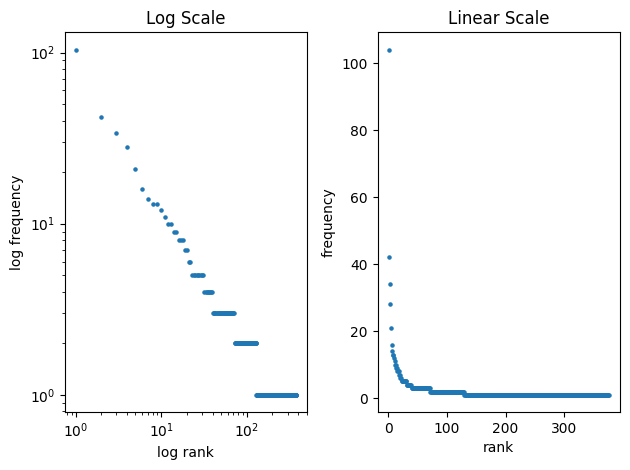

In [6]:
ranks = word_frequencies.most_common()
words, frequency = zip(*ranks)
ranks = range(1, len(words)+1)

# Plot with log axes
plt.subplot(1, 2, 1)
plt.scatter(ranks, frequency, s=5)
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.xscale('log')
plt.yscale('log')
plt.title('Log Scale')
plt.tight_layout()

# Plot without log axes
plt.subplot(1, 2, 2)
plt.scatter(ranks, frequency, s=5)
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Linear Scale')
plt.tight_layout()

plt.show()

#### word distributions follow a pattern called Zipf's law
#### the frequency of a word is inversely proportional to its rank

## Keywords

In [8]:
n_tokens = len(tokens)
relative_frequency = [f/n_tokens * 10000 for f in frequency] # corrected (per ten thousand tokens)

for i in range(10):
    print(f"token: {words[i]}, frequency: {frequency[i]}, relative frequency: {relative_frequency[i]}")

token: the, frequency: 104, relative frequency: 1115.8798283261804
token: of, frequency: 42, relative frequency: 450.6437768240344
token: and, frequency: 34, relative frequency: 364.80686695278973
token: to, frequency: 28, relative frequency: 300.42918454935625
token: that, frequency: 21, relative frequency: 225.3218884120172
token: indigenous, frequency: 16, relative frequency: 171.67381974248926
token: as, frequency: 14, relative frequency: 150.21459227467813
token: mohawk, frequency: 13, relative frequency: 139.48497854077254
token: by, frequency: 13, relative frequency: 139.48497854077254
token: in, frequency: 12, relative frequency: 128.75536480686696


keywords are words that have higher relative frequencies than in a reference corpus. This reference corpus is the brown corpus from nltk.

In [9]:
import nltk
from nltk.corpus import brown

nltk.download('brown')
reference_words = brown.words()

[nltk_data] Downloading package brown to /Users/Hunter/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [10]:
reference_tokens = [word.lower() for word in reference_words if word.isalpha()]
reference_frequencies = Counter(reference_tokens)
print(len(reference_tokens))
print(len(reference_frequencies))

981716
40234


In [14]:
n_tokens_ref = len(reference_tokens)
absolute_frequencies = [f for t, f in reference_frequencies.most_common()]
relative_reference_frequency = [f/n_tokens_ref * 10000 for f in absolute_frequencies] # corrected (per ten thousand tokens)
ref_tokens = [token for token, freq in reference_frequencies.most_common()]
for i in range(10):
    print(f"token: {ref_tokens[i]}, frequency: {absolute_frequencies[i]}, relative frequency: {relative_reference_frequency[i]}")

token: the, frequency: 69971, relative frequency: 712.7417705324146
token: of, frequency: 36412, relative frequency: 370.9015641998297
token: and, frequency: 28853, relative frequency: 293.9037359073296
token: to, frequency: 26158, relative frequency: 266.4518047989439
token: a, frequency: 23195, relative frequency: 236.26995994768345
token: in, frequency: 21337, relative frequency: 217.3439161631266
token: that, frequency: 10594, relative frequency: 107.91308280602537
token: is, frequency: 10109, relative frequency: 102.97275383104687
token: was, frequency: 9815, relative frequency: 99.97799771013204
token: he, frequency: 9548, relative frequency: 97.25827021256657


to compare the relative frequencies to the reference frequencies, I need to store a list of all the words in the challenge, their relative frequencies in the challenge and their relative frequencies in the reference corpus.

In [21]:
#for token in set(tokens):
#    print(token)
print(len(set(tokens)))

376


In [17]:
comparison = list() # a list of tuples (token, relative frequency in the challenge, relative frequency in the reference corpus)
for token in set(tokens):
    if token in reference_frequencies:
        comparison.append((token, relative_frequency[words.index(token)], relative_reference_frequency[ref_tokens.index(token)]))
    if token not in reference_frequencies:
        print(f"token {token} not in reference corpus")
        
for i in range(10):
    print(comparison[i])

token tekanontak not in reference corpus
token lidar not in reference corpus
token inuit not in reference corpus
token archivists not in reference corpus
token infrastructures not in reference corpus
token disclosing not in reference corpus
token québécoise not in reference corpus
token penetrant not in reference corpus
token société not in reference corpus
token mohawk not in reference corpus
token affidavit not in reference corpus
token spearheaded not in reference corpus
token caretakers not in reference corpus
token invasive not in reference corpus
token keepers not in reference corpus
token laser not in reference corpus
token protocols not in reference corpus
token mcgill not in reference corpus
token mkultra not in reference corpus
token iroquoian not in reference corpus
token archival not in reference corpus
token blouin not in reference corpus
token homologated not in reference corpus
token sqi not in reference corpus
token precolonial not in reference corpus
('already', 10.729

In [16]:
len(comparison)

351

In [22]:
import pandas as pd

df = pd.DataFrame(comparison, columns=['token', 'relative_frequency_challenge', 'relative_frequency_reference'])
df.head()

,token,relative_frequency_challenge,relative_frequency_reference
0,already,10.729614,2.780845
1,because,10.729614,8.994455
2,convey,10.729614,0.132421
3,situation,10.729614,1.996504
4,gathered,10.729614,0.325960


In [27]:
relative_freq = df.assign(relative_frequency_difference = lambda x: x.relative_frequency_challenge / x.relative_frequency_reference).sort_values(by='relative_frequency_difference', ascending=False)
relative_freq.head(30)

,token,relative_frequency_challenge,relative_frequency_reference,relative_frequency_difference
259,indigenous,171.673820,0.030559,5617.831187
281,unmarked,32.188841,0.010186,3160.030043
12,quebec,42.918455,0.020372,2106.686695
104,reconciliation,21.459227,0.010186,2106.686695
227,philippe,10.729614,0.010186,1053.343348
24,closure,10.729614,0.010186,1053.343348
224,survivor,10.729614,0.010186,1053.343348
301,amicable,10.729614,0.010186,1053.343348
63,archaeologists,10.729614,0.010186,1053.343348
309,disciplinary,10.729614,0.010186,1053.343348


# colocations

a colocation is a series of words that co-occur more often than would be expected by chance.

In [37]:
def prob_ngrams(tokens, n):
    ngrams = list()
    for i in range(len(tokens)-n+1):
        ngrams.append(tuple(tokens[i:i+n]))
    
    ngram_counts = Counter(ngrams)
    ngram_probabilities = dict()
    for ngram, count in ngram_counts.items():
        if n == 1:
            ngram_probabilities[ngram[0]] = count / len(ngrams)
        else:
            ngram_probabilities[ngram] = count / len(ngrams)
        
    return ngram_probabilities

unigram_probabilities = prob_ngrams(tokens, 1)
bigram_probabilities = prob_ngrams(tokens, 2)

for i in range(10):
    print(f"unigram: {list(unigram_probabilities.keys())[i]}, probability: {list(unigram_probabilities.values())[i]}")
    print(f"bigram : {list(bigram_probabilities.keys())[i]}, probability: {list(bigram_probabilities.values())[i]}")

unigram: on, probability: 0.01072961373390558
bigram : ('on', 'october'), probability: 0.00322234156820623
unigram: october, probability: 0.003218884120171674
bigram : ('october', 'the'), probability: 0.0021482277121374865
unigram: the, probability: 0.11158798283261803
bigram : ('the', 'mohawk'), probability: 0.01288936627282492
unigram: mohawk, probability: 0.013948497854077254
bigram : ('mohawk', 'mothers'), probability: 0.008592910848549946
unigram: mothers, probability: 0.008583690987124463
bigram : ('mothers', 'won'), probability: 0.0010741138560687433
unigram: won, probability: 0.001072961373390558
bigram : ('won', 'an'), probability: 0.0010741138560687433
unigram: an, probability: 0.006437768240343348
bigram : ('an', 'important'), probability: 0.0010741138560687433
unigram: important, probability: 0.001072961373390558
bigram : ('important', 'the'), probability: 0.0010741138560687433
unigram: injunction, probability: 0.003218884120171674
bigram : ('the', 'injunction'), probabilit

In [62]:
def mutual_information(bigram):
    word_one = bigram[0]
    word_two = bigram[1]
    p_one = unigram_probabilities[word_one]
    p_two = unigram_probabilities[word_two]
    p_bigram = bigram_probabilities[bigram]
    
    # Check if any of the probabilities are 0. If they are, return 0.
    if p_one == 0 or p_two == 0 or p_bigram == 0:
        return 0
    
    return math.log(p_bigram / (p_one * p_two))

mutual_information(('important','the'))

2.1940154529527427

In [58]:
mi = dict() # keys are bigrams and values are mutual information scores
for bigram in bigram_probabilities.keys():
    mi[bigram] = mutual_information(bigram)

mi = [(bigram, mi_score) for bigram, mi_score in mi.items()]
strings = list()
mi_scores = list()
for bigram in mi:
    string = bigram[0][0] + ' ' + bigram[0][1]
    strings.append(string)
    mi_score = bigram[1]
    mi_scores.append(mi_score)

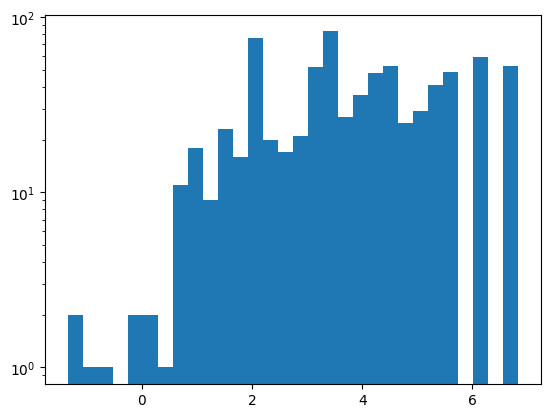

In [72]:
# cSpell:words bigram
mi_df = pd.DataFrame({'bigram': strings, 'mutual_information': mi_scores})
filtered_df = mi_df[mi_df['mutual_information'] != 6.838406]
filtered_df.sort_values(by='mutual_information', ascending=False).head(100)

plt.hist(mi_scores, bins=30, log=True)
plt.show()
